In [112]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
df = pd.read_csv('/Users/m/Documents/MLProject/notebook/data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Check to perform 

* Check missing values 
* Check duplicate 
* Check data types 
* Check number of unique values of each column 
* Check statistics of dataset 
* Check various categories of different categorical columns

Checking Missing Values

In [113]:
df.isnull().sum()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Checking Duplicates

In [114]:
df.duplicated().sum()

0

Checking data types

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking no. of unique values

In [116]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Checking statistics of dataset

In [117]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [118]:
def printCategories(col):
    if df[col].dtype not in ('int8','float32','int64'):
        print(f"Categories in {col} column : {df[col].unique()}")
    
for col in df.columns:
    printCategories(col)

Categories in gender column : ['female' 'male']
Categories in race/ethnicity column : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column : ['standard' 'free/reduced']
Categories in test preparation course column : ['none' 'completed']


Numerical & Categorical Columns

In [119]:
numerical_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64', 'int32', 'float32']]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'No. of numerical features {len(numerical_features)} and those are : {numerical_features}')
print(f'No. of categorical features {len(categorical_features)} and those are : {categorical_features}')

No. of numerical features 3 and those are : ['math score', 'reading score', 'writing score']
No. of categorical features 5 and those are : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [120]:
df['total_score'] = df['math score']+ df['reading score']+ df['writing score']
df['avg_score'] = df.total_score/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [121]:
def full_marks(col):
    if df[col].dtype != 'object':
        print(f'No. of students with full marks in {col} : {df[df[col]==100]['avg_score'].count()}')
    
for col in df.columns:
    full_marks(col)
    

No. of students with full marks in math score : 7
No. of students with full marks in reading score : 17
No. of students with full marks in writing score : 14
No. of students with full marks in total_score : 0
No. of students with full marks in avg_score : 3


In [122]:
def less_than(col):
    if df[col].dtype != 'object':
        print(f'No. of students with less than 20 marks in {col} : {df[df[col]<=20]['avg_score'].count()}')
        
for col in df.columns:
    less_than(col)

No. of students with less than 20 marks in math score : 4
No. of students with less than 20 marks in reading score : 1
No. of students with less than 20 marks in writing score : 3
No. of students with less than 20 marks in total_score : 0
No. of students with less than 20 marks in avg_score : 2


Histogram & KDE

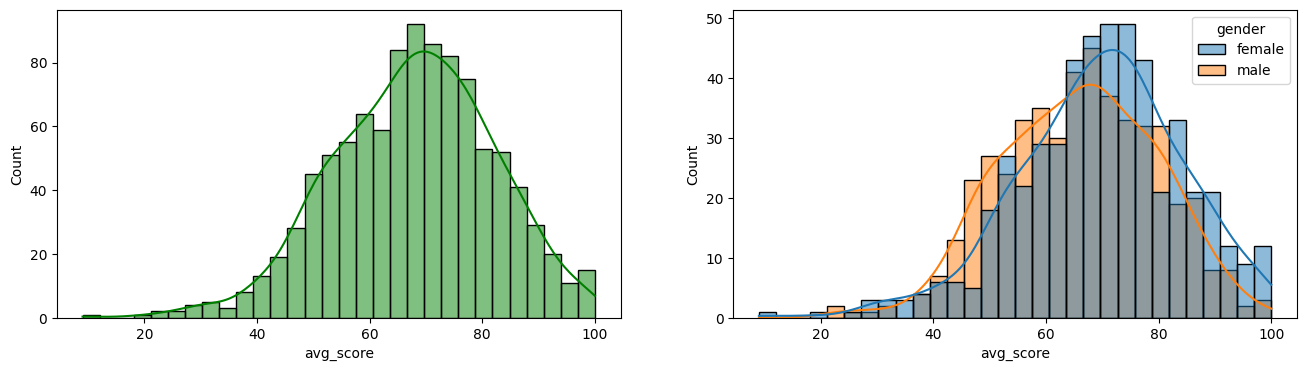

In [128]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='gender')
plt.show()


Plotting histogram to check gender score performance on total

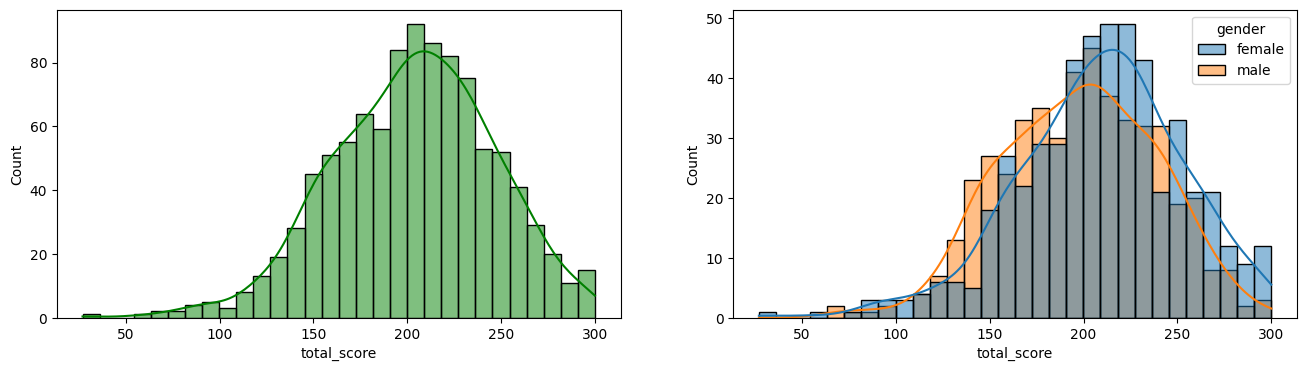

In [130]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()

Plotting histogram to check race/ethnicity score performance on avg 

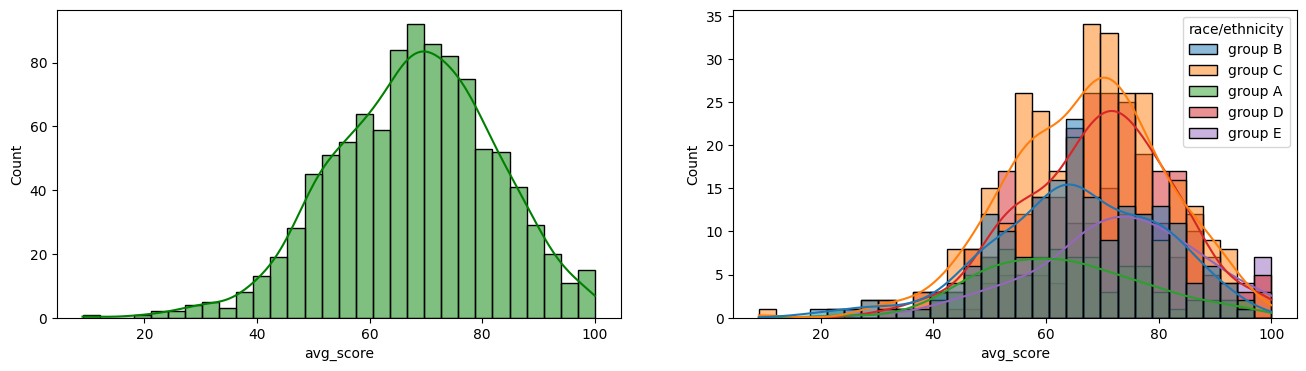

In [129]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='race/ethnicity')
plt.show()

Insights : 
1. Female vs male students performance on lunch

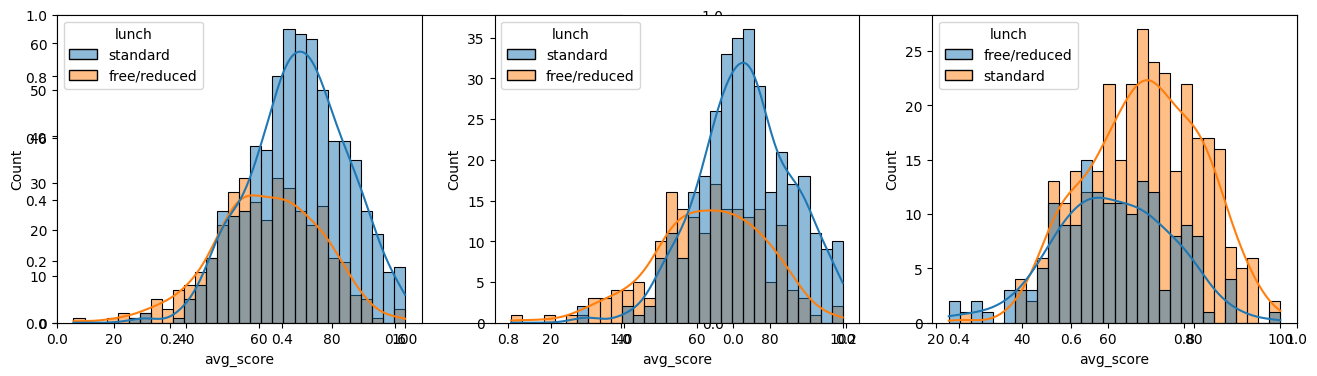

In [131]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
plt.subplot(131)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='avg_score', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='avg_score', bins=30, kde=True, hue='lunch')
plt.show()